# Heart disease analysis

Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.random as rnd

In [2]:
df = pd.read_csv(r'C:\Users\SAMANVITHA\OneDrive\Desktop\numpy\heart.csv')

UNDERSTAND EACH COLUMN

In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

age

sex

cp:chest pain type (4 values)

trestbps:resting blood pressure

chol:serum cholestoral in mg/dl

fbs:fasting blood sugar > 120 mg/dl

restecg:resting electrocardiographic results (values 0,1,2)

thalach:maximum heart rate achieved

exang:exercise induced angina

oldpeak: ST depression induced by exercise relative to rest

the slope of the peak exercise ST segment

ca:number of major vessels (0-3) colored by flourosopy

thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

target: 0=less chances of heart attack 1=more chances of heart


GET THE INFORMATION OF COLUMNS AND NOTE THE OBSERVATION

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Data do not need any transformation

# Data cleaning

check the null value in the dataset

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

check for duplicate data and drop them

In [6]:
dup=df.duplicated().any()
dup

True

In [7]:
df=df.drop_duplicates()

In [8]:
df.shape

(302, 14)

In [9]:
df.duplicated().any()

False

# Data analysis

1.Display the top 5 rows

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


2.last 5 rows of the data set

In [11]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
878,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


3.find the shape of data set

In [12]:
df.shape

(302, 14)

4.get the information about our dataset

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


There are no null values and and we have 1 float and 13 integer 

5.get the overall statistics about the dataset

In [14]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


6.how many people have heart disease and howmany dont have heart disease in the dataset

In [15]:
df['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

7.find the count of male nd female

In [16]:
df['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

# ANALYSIS USING PLOTS

1.draw the correlation matrix

<Axes: >

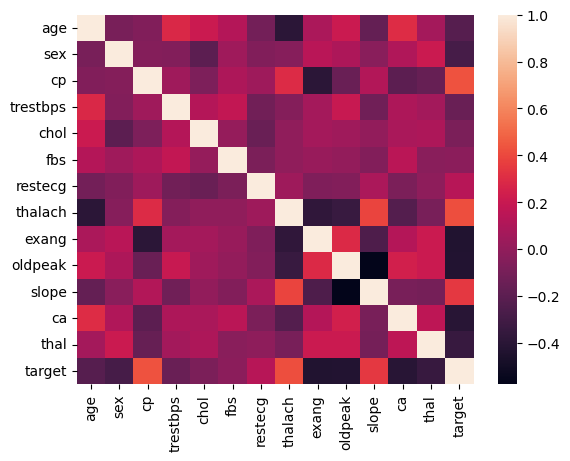

In [17]:
sns.heatmap(df.corr())

observation:

The cp,thalach,slope shows positive correlation with target value and ca,oldpeak,exang,sex,thal,age shows negative correlation with the target value

2.many people have heart disease and howmany dont have heart disease in the dataset

In [18]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [19]:
df['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

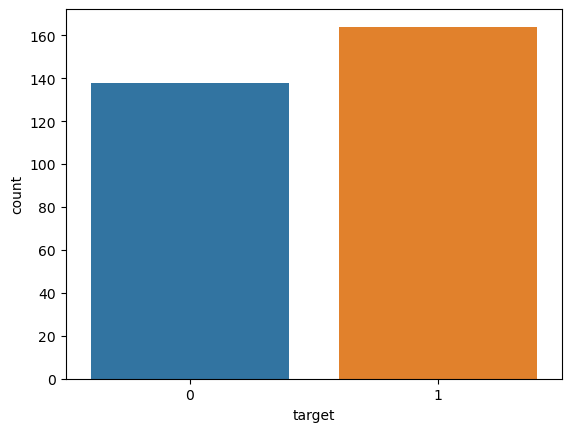

In [20]:
sns.countplot(x='target',data=df)

observation:

0 indicates the no disease and 1 indicates heart disease and more than half of the people have heart disease 

3.find the count of male nd female

In [21]:
df['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

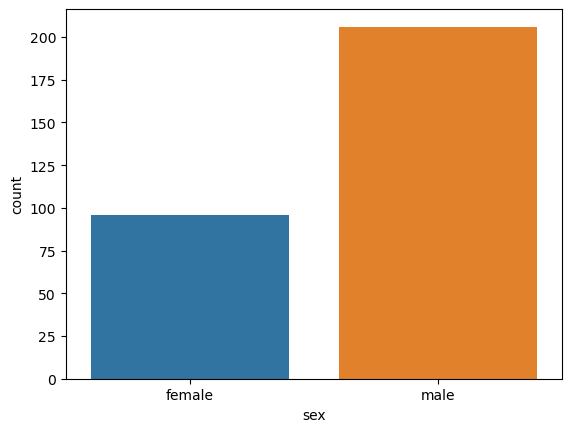

In [22]:
sns.countplot(data=df,x='sex')
plt.xticks([0,1],['female','male'])
plt.show()

observation:

we can see that male ratio is high

4.find the gender distribution according to the target variable

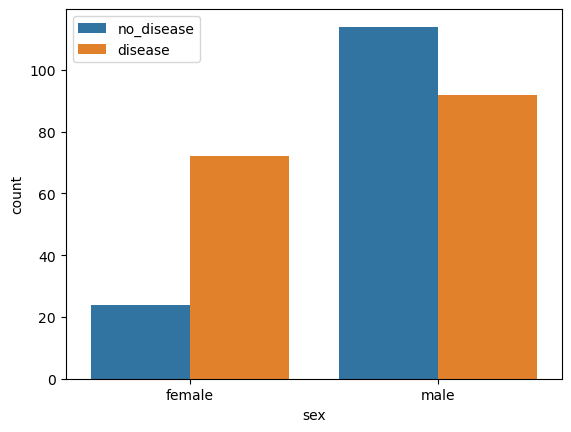

In [23]:
sns.countplot(data=df,x='sex',hue='target')
plt.xticks([1,0],['male','female'])
plt.legend(labels=['no_disease','disease'])
plt.show()

observation:


The male patients who have heart disease is high

5.check the age distribution

c:\Users\SAMANVITHA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


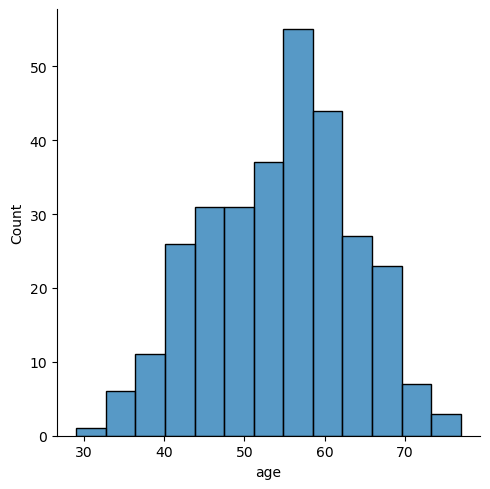

In [24]:
sns.displot(data=df,x='age')
plt.show()

observation:

In this study we can see that most of the people are from age 50 to 60

6.check the chest pain type



Chest pain type (4 values)

Value 0: typical angina

Value 1: atypical angina

Value 2: non-anginal pain

Value 3: asymptomatic

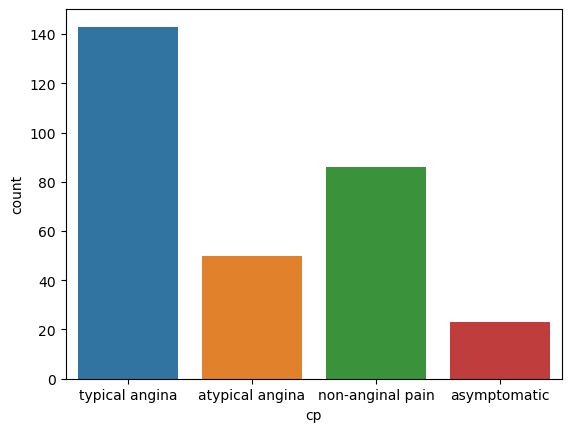

In [25]:
sns.countplot(data=df,x='cp')
plt.xticks([0,1,2,3],['typical angina','atypical angina','non-anginal pain','asymptomatic'])

plt.show()

observation:

People who are suffering from typical angina are more common

7.show the chest pain distribution as per target varible

<function matplotlib.pyplot.show(close=None, block=None)>

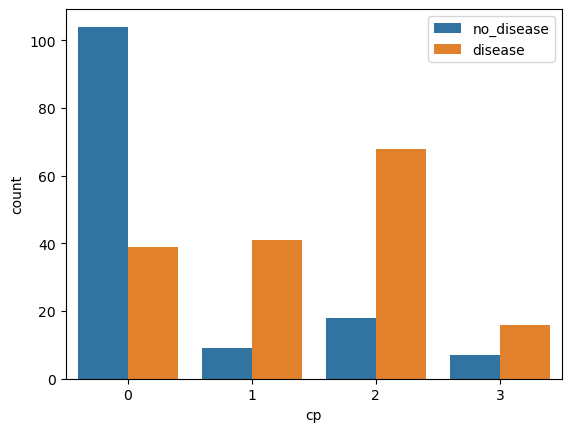

In [26]:
sns.countplot(data=df,x='cp',hue='target')
plt.legend(labels=['no_disease','disease'])
plt.show

observation:

we can see that healthy people have more cheast pain and Diseased people have more non-anginal pain 


8.show fasting blood suger distribution according to the target variable

<function matplotlib.pyplot.show(close=None, block=None)>

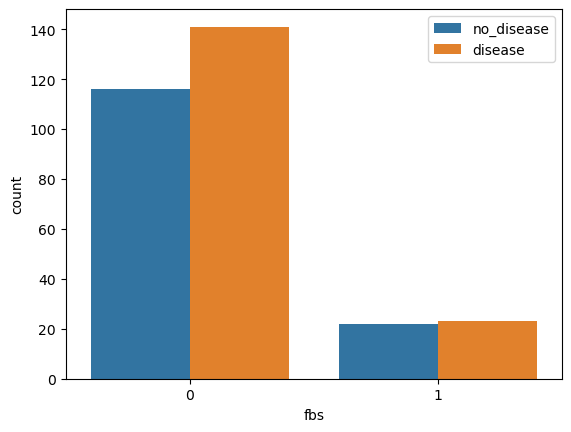

In [27]:
sns.countplot(data=df,x='fbs',hue='target')
plt.legend(labels=['no_disease','disease'])
plt.show

observation:

there are high number of people with heart disease

9.check resting blood pressre distribution

In [28]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Axes: >

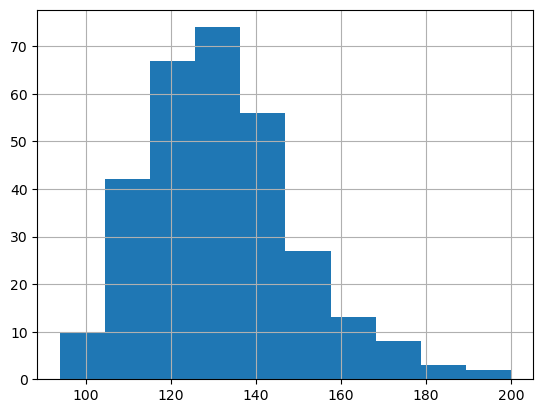

In [29]:
df['trestbps'].hist()

observation:

we can see that the blood presure of the people in this study is between 120-140

10.compare resting blood pressure as per sex

c:\Users\SAMANVITHA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\SAMANVITHA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\SAMANVITHA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


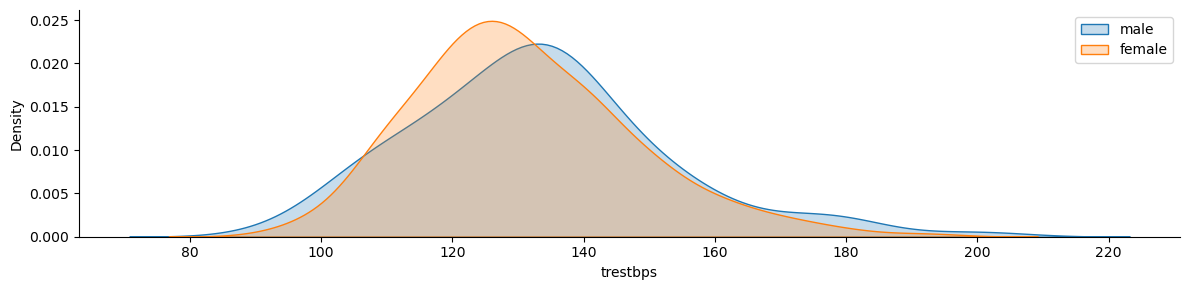

In [30]:
g=sns.FacetGrid(df,hue='sex',aspect=4)
g.map(sns.kdeplot,'trestbps',shade=True)
plt.legend(labels=['male','female'])
plt.show()


observation:

female have the lower resting blood pressure than male

11.show the distibution of the serum cholesterol

<Axes: >

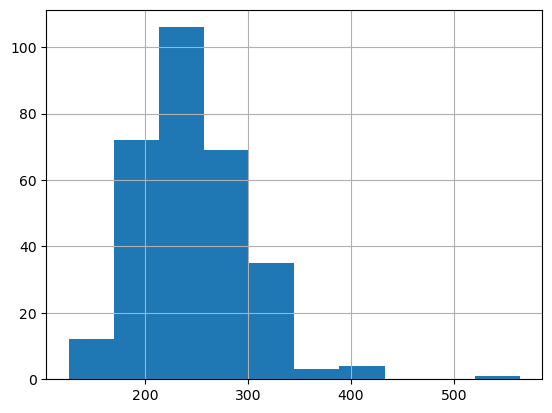

In [31]:
df['chol'].hist()

# conclusion

--> Through this analysis of patients dataset, we found that more than 50% had signs of heart disease.

-->The male patients who have heart disease is high
 
-->Factors like age, high cholesterol (avg: 246 mg/dL) stood out as important indicators.

-->People who are suffering from typical angina are more common

--> Visual trends also showed that chest pain type  non-anginal pain played a big role in predicting heart issues.